# Metodo della Massima Verosimiglianza applicato ai dati di Centa San Nicolò

Matteo Franzoi - Andrea Rebellato - 2019-03-23

---

Primo passo è importare le librerie

In [26]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [27]:
os.getcwd()

'/media/data/jupyter/esercitazione'

In [28]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 'abs_mle',  
 'best_parameters',  
 'lsCenta.ipynb',  
 'lsppCenta.ipynb',  
 '**massimePrecipitazioniCenta.csv**',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb',  
 'pearsonCenta.ipynb']

e importare il ffile _csv_ dei dati

In [29]:
pd.set_option('display.max_rows', 20)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,15min,30min,45min,1h,3h,6h,12h,24h
anno,,,,,,,,
1934,NaN,NaN,NaN,22.6,42.0,56.6,58.8,85.0
1935,NaN,NaN,NaN,17.8,32.6,54.2,63.6,88.0
1936,NaN,NaN,NaN,15.8,28.0,41.4,72.0,85.2
1937,NaN,NaN,NaN,27.8,35.6,38.2,58.4,62.6
1938,NaN,NaN,NaN,15.0,21.4,32.0,56.0,83.0
1939,NaN,NaN,NaN,29.4,36.2,61.0,115.2,117.8
1940,NaN,NaN,NaN,28.8,67.0,94.0,119.0,135.2
1941,NaN,NaN,NaN,14.2,21.0,25.6,44.0,51.0
1942,NaN,NaN,NaN,27.0,42.0,66.2,82.6,85.6


Il metodo della massima verosimiglianza calcola i valori di **a, b** che massimizzano la probabilità congiunta di ottenere una serie di dati __$\{h_1,\dots,h_n\}$__.  
Viene calcolata la coppia di valori *a* e _b_ per ogni durata

Per 15min

In [30]:
samp = data['15min'].dropna()
param15min = gumbel_r.fit(samp)
param15min

(11.551692125023424, 4.0510399738168505)

Per 30min

In [31]:
samp = data['30min'].dropna()
param30min = gumbel_r.fit(samp)
param30min

(15.102190934819026, 5.406040427311871)

Per 45min

In [32]:
samp = data['45min'].dropna()
param45min = gumbel_r.fit(samp)
param45min

(17.63853950051344, 6.168513338425186)

Per 1h

In [33]:
samp = data['1h'].dropna()
param1h = gumbel_r.fit(samp)
param1h

(20.07773753202705, 6.560460617974382)

Per 3h

In [34]:
samp = data['3h'].dropna()
param3h = gumbel_r.fit(samp)
param3h

(30.042461167355263, 9.253391584430704)

Per 6h

In [35]:
samp = data['6h'].dropna()
param6h = gumbel_r.fit(samp)
param6h

(41.084931130740436, 12.291069231710425)

Per 12h

In [36]:
samp = data['12h'].dropna()
param12h = gumbel_r.fit(samp)
param12h

(57.40209293321375, 19.296025817381924)

E infine per 24h

In [37]:
samp = data['24h'].dropna()
param24h = gumbel_r.fit(samp)
param24h

(76.44079169216053, 24.643280756008394)

È utile creare un DataFrame contente tutti i valori di _a_ e *b* e salvarlo in un file

In [38]:
abs_mle = pd.DataFrame([
    param15min,
    param30min,
    param45min,
    param1h, 
    param3h,
    param6h,
    param12h,
    param24h],
    columns = ['a', 'b'],
    index = ['15min', '30min', '45min','1h', '3h', '6h', '12h', '24h']
).T
abs_mle

,15min,30min,45min,1h,3h,6h,12h,24h
a,11.551692,15.102191,17.638540,20.077738,30.042461,41.084931,57.402093,76.440792
b,4.051040,5.406040,6.168513,6.560461,9.253392,12.291069,19.296026,24.643281


In [39]:
abs_mle.to_pickle('abs_mle')

In [40]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 '**abs_mle**',  
 'lsCenta.ipynb',  
 'massimePrecipitazioniCenta.csv',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb']

Una volta salvati i dati, si calcolano i valori minimo e il massimo di precipitazione

In [41]:
data.min()

15min     5.2
30min     8.0
45min     9.6
1h       12.6
3h       20.0
6h       24.0
12h      24.2
24h      43.6
dtype: float64

Il minimo è il valore corrispondente alla durata di 15min

In [42]:
data.min()['15min']

5.2

In [43]:
data.max()

15min     28.0
30min     40.0
45min     47.0
1h        55.8
3h        79.0
6h       103.8
12h      152.2
24h      192.0
dtype: float64

mentre il massimo corrisponde alle 24h

In [44]:
data.max()['24h']

192.0

Si crea allora un vettore lineare di 100 valori che vanno dal minimo al massimo

In [45]:
t_rain = np.linspace(data.min()['15min'], data.max()['24h'], 100)

Ricordando che la funzione di Gumbel è definita come
$$
\Large{e^{-e^{-\frac{h-a}{b}}}}
$$
si può scrivere

In [46]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

Il DataFrame contenente tutti i valori ricavati dalla funzione di Gumbel appena scritta è

In [47]:
teta = []
for h in data.columns:
        teta = teta + [gumbel(t_rain, abs_mle, h)]
        
gb = pd.DataFrame(teta, index = ['15min', '30min', '45min', '1h', '3h', '6h', '12h', '24h'], columns = t_rain
).T #Trasposta

#------------------------------------------
gb

,15min,30min,45min,1h,3h,6h,12h,24h
5.200000,0.008257,0.001941,0.000547,0.000064,4.325293e-07,8.930799e-09,3.186306e-07,1.509098e-08
7.086869,0.049262,0.012220,0.003958,0.000714,6.455776e-06,1.248472e-07,1.283803e-06,5.691406e-08
8.973737,0.151131,0.044739,0.017005,0.004368,5.852369e-05,1.199086e-06,4.542864e-06,1.946382e-07
10.860606,0.305438,0.111745,0.049760,0.016987,3.532736e-04,8.346486e-06,1.429006e-05,6.079599e-07
12.747475,0.475020,0.213131,0.109721,0.047042,1.530609e-03,4.407953e-05,4.039931e-05,1.746070e-06
14.634343,0.626742,0.336083,0.196428,0.100994,5.060092e-03,1.837030e-04,1.036737e-04,4.639551e-06
16.521212,0.745835,0.463414,0.301623,0.179131,1.341717e-02,6.248549e-04,2.436884e-04,1.147115e-05
18.408081,0.831887,0.581278,0.413658,0.275320,2.971955e-02,1.785582e-03,5.289621e-04,2.653140e-05
20.294949,0.890899,0.682029,0.521997,0.380057,5.684766e-02,4.394260e-03,1.068215e-03,5.768622e-05
22.181818,0.930058,0.763430,0.619543,0.484022,9.647719e-02,9.513328e-03,2.020498e-03,1.184461e-04


E quindi plottare i dati

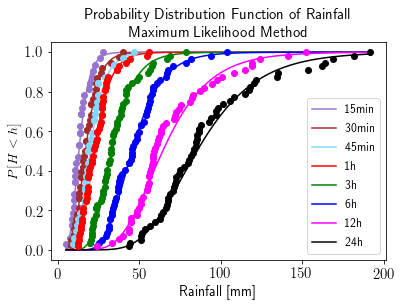

In [49]:
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

#----------------plot---------------

ax = gb.plot(color = ['#9575cd', 'brown', '#80d8ff','red', 'green', 'blue', 'magenta', 'black'])
#plt.figure(figsize = (18 ,16), dpi = 100)

#--------------15min--------------------
data15min = data['15min'].dropna()
ecdf15min = ECDF(data15min)
ax.plot(data15min, ecdf15min(data15min), 'o', c = '#9575cd')

#--------------30min--------------------
data30min = data['30min'].dropna()
ecdf30min = ECDF(data30min)
ax.plot(data30min, ecdf30min(data30min), 'o', c = 'brown')

#--------------45min--------------------
data45min = data['45min'].dropna()
ecdf45min = ECDF(data45min)
ax.plot(data45min, ecdf45min(data45min), 'o', c = '#80d8ff')

#--------------1h--------------------
data1h = data['1h'].dropna()
ecdf1h = ECDF(data1h)
ax.plot(data1h, ecdf1h(data1h), 'o', c = 'red')

#--------------3h--------------------
data3h = data['3h'].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h, ecdf3h(data3h), 'o', c = 'green')

#--------------6h--------------------
data6h = data['6h'].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h, ecdf6h(data6h), 'o', c = 'blue')

#--------------12h-------------------
data12h = data['12h'].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h, ecdf12h(data12h), 'o', c = 'magenta')

#--------------24h-------------------
data24h = data['24h'].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h, ecdf24h(data24h), 'o', c = 'black')

#----------------------------label--------------------------------------
ax.set_title('Probability Distribution Function of Rainfall\nMaximum Likelihood Method', fontsize = 15)
ax.set_xlabel('Rainfall [mm]', fontsize = 14)
ax.set_ylabel(r'$P[H < h]$', fontsize = 14)
plt.legend(loc = 4,  fontsize = 12)

#-----------------------------------------------------------------------
plt.show()

**dropna()** separa ed elimina i dati NaN.